<a id="1"></a>
## 1.Loading DataSet

In [5]:
# %% Importing Libraries

# Libraries for Data Manipulation and Analysis
import numpy as np  # Used for numerical operations
import pandas as pd  # Used for data manipulation and handling

# Libraries for Data Visualization
import matplotlib.pyplot as plt  # Used for data visualization
import seaborn as sns  # Used for statistical data visualization based on Matplotlib

# Library to Suppress Warnings
import warnings

# %% Configurations

# Seaborn Configuration for Aesthetic Style of Plots
sns.set_style("whitegrid")

# Matplotlib Configuration for Plot Size
plt.rcParams['figure.figsize'] = (10, 6)

# Ensuring Matplotlib Plots are Displayed Inline in Jupyter Environment
%matplotlib inline

# Matplotlib Configuration for Styling and Layout
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Suppressing All Warnings for Cleaner Output
warnings.filterwarnings("ignore")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

# Define the path to the CSV file
file_path = "/content/drive/MyDrive/DATASETS/SP 500/all_stocks_5yr.csv"

# Try to load the data and catch any errors
try:
    SP500A = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.EmptyDataError:
    print(f"No data in file: {file_path}")
except pd.errors.ParserError:
    print(f"Error parsing file: {file_path}")
except Exception as e:
    print(f"Unexpected error: {e}")

# Display basic information about the loaded data
if 'SP500A' in locals():  # Check if the data is loaded and the variable exists
    print("\nFirst 5 rows of the data:")
    print(SP500A.head())
    print("\nBasic information about the data:")
    print(SP500A.info())
    print("\nBasic statistical summary of the data:")
    print(SP500A.describe())


Data loaded successfully!

First 5 rows of the data:
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

Basic information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None

Basic statistical summary of the data:
          

# **2. Visualization**

In [8]:
SP500AW=SP500A


In [9]:
import pandas as pd

def preprocess_data(df, date_col='date', rename_dict={'Name': 'ticks'}, date_format='%Y/%m/%d'):
    """
    Preprocess the data: rename columns, handle missing values, and convert date columns to datetime dtype.

    Parameters:
    - df: DataFrame to be preprocessed
    - date_col: Name of the column containing date information
    - rename_dict: Dictionary mapping current column names to desired new names
    - date_format: Format of the date information in the date column

    Returns:
    - DataFrame: Preprocessed data
    """

    # Copying the original dataframe to avoid modifying it in-place
    rdf = df.copy()

    # Renaming columns as per rename_dict
    rdf.rename(columns=rename_dict, inplace=True)

    # Handling Missing Values
    # (This step might need more detail depending on the use case and how NaN values affect the analysis)
    rdf.dropna(inplace=True)

    # Converting date column to datetime dtype
    try:
        rdf[date_col] = pd.to_datetime(rdf[date_col], format=date_format)
    except KeyError:
        print(f"Column {date_col} not found in the DataFrame.")
    except ValueError:
        print(f"Date values in column {date_col} could not be converted using format {date_format}.")

    return rdf

# Assuming SP500A is defined...
new_df = preprocess_data(SP500A)

# Displaying basic information about the new dataframe
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   ticks   619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [10]:
# Determine the average volume of each stock using the function and sort the ten most actively traded stocks for further analysis
mean_dict = {}

# Determine the average trading volume over a period of time using for loops
for key in new_df['ticks'].unique():
    value = new_df[new_df['ticks'] == key ]['volume'].mean()
    mean_dict[key]= value

print("Length of the mean of ticks dictionary:", len(mean_dict))

# convert dict to pandas dataframe
avaerage_s = pd.Series(mean_dict).transpose()
top10_s = avaerage_s.sort_values(ascending=False)[:10]

print("Top ten companies with the highest average traded volume:\n", top10_s.index)

Length of the mean of ticks dictionary: 505
Top ten companies with the highest average traded volume:
 Index(['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO'], dtype='object')


In [11]:
# function to return top 10 sub dataframe
def subdataframe(df, tick):

    # top 10 ticks
    ticks = list(top10_s.index)

    assert tick in ticks, """Stock tick does not belong to top 10 stocks by trade volume, please try any of these:\n
    ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']"""

    ndf = new_df[new_df['ticks'] == tick]
    return ndf

In [12]:
# company dict for respective ticks (TOP 10 STOCKS BY AVERAGE TRADE VOLUME)
company_dict = {'BAC':'Bank of America',
                'AAPL':'Apple',
                'GE':'General Electric',
                'F':'Ford Motor Company',
                'FB':'Facebook',
                'MSFT':'Microsoft',
                'AMD':'Adavanced Micro Devices',
                'MU':'Micron Technology',
                'INTC':'Intel Corp',
                'CSCO':'Cisco'
               }

bac_df = subdataframe(new_df, 'BAC')
aapl_df = subdataframe(new_df, 'AAPL')
ge_df = subdataframe(new_df, 'GE')
f_df = subdataframe(new_df, 'F')
fb_df = subdataframe(new_df, 'FB')
msft_df = subdataframe(new_df, 'MSFT')
amd_df = subdataframe(new_df, 'AMD')
mu_df = subdataframe(new_df, 'MU')
intc_df = subdataframe(new_df, 'INTC')
csco_df = subdataframe(new_df, 'CSCO')


# to return daily return and company Name
def dailyfunc(df):
    df = df.copy()
    df['daily return'] = ((df['close'] - df['open'])/df['open'])*100
    df.style.format('{:.2f}%', subset='daily return')
    df['daily_mean'] = (df['open'] + df['close'] + df['high'] + df['low'])/4
    df['co_name'] = company_dict[df['ticks'].unique()[0]]
    return df

bac_df = dailyfunc(bac_df)
aapl_df = dailyfunc(aapl_df)
ge_df = dailyfunc(ge_df)
f_df = dailyfunc(f_df)
fb_df = dailyfunc(fb_df)
msft_df = dailyfunc(msft_df)
amd_df = dailyfunc(amd_df)
mu_df = dailyfunc(mu_df)
intc_df = dailyfunc(intc_df)
csco_df = dailyfunc(csco_df)

print('\t\tStart Date\t\t\t\t\tEnd Date')
print(f"BAC\t\t{bac_df['date'].min()}\t\t\t{bac_df['date'].max()}")
print(f"AAPL\t\t{aapl_df['date'].min()}\t\t\t{aapl_df['date'].max()}")
print(f"GE\t\t{ge_df['date'].min()}\t\t\t{ge_df['date'].max()}")
print(f"F\t\t{f_df['date'].min()}\t\t\t{f_df['date'].max()}")
print(f"FB\t\t{fb_df['date'].min()}\t\t\t{fb_df['date'].max()}")
print(f"MSFT\t\t{msft_df['date'].min()}\t\t\t{msft_df['date'].max()}")
print(f"AMD\t\t{amd_df['date'].min()}\t\t\t{amd_df['date'].max()}")
print(f"MU\t\t{mu_df['date'].min()}\t\t\t{mu_df['date'].max()}")
print(f"INTC\t\t{intc_df['date'].min()}\t\t\t{intc_df['date'].max()}")
print(f"CSCO\t\t{csco_df['date'].min()}\t\t\t{csco_df['date'].max()}")

		Start Date					End Date
BAC		2013-02-08 00:00:00			2018-02-07 00:00:00
AAPL		2013-02-08 00:00:00			2018-02-07 00:00:00
GE		2013-02-08 00:00:00			2018-02-07 00:00:00
F		2013-02-08 00:00:00			2018-02-07 00:00:00
FB		2013-02-08 00:00:00			2018-02-07 00:00:00
MSFT		2013-02-08 00:00:00			2018-02-07 00:00:00
AMD		2013-02-08 00:00:00			2018-02-07 00:00:00
MU		2013-02-08 00:00:00			2018-02-07 00:00:00
INTC		2013-02-08 00:00:00			2018-02-07 00:00:00
CSCO		2013-02-08 00:00:00			2018-02-07 00:00:00


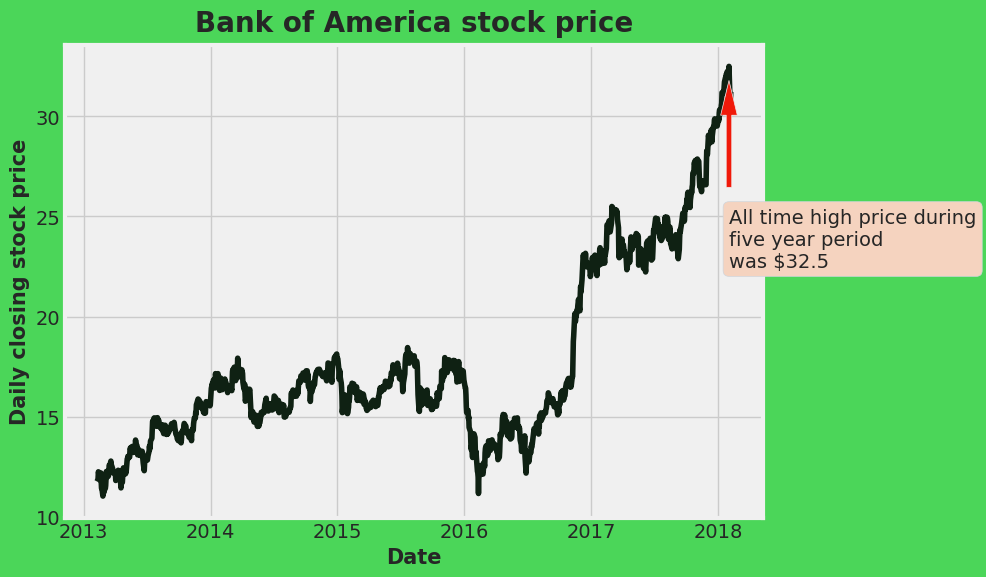

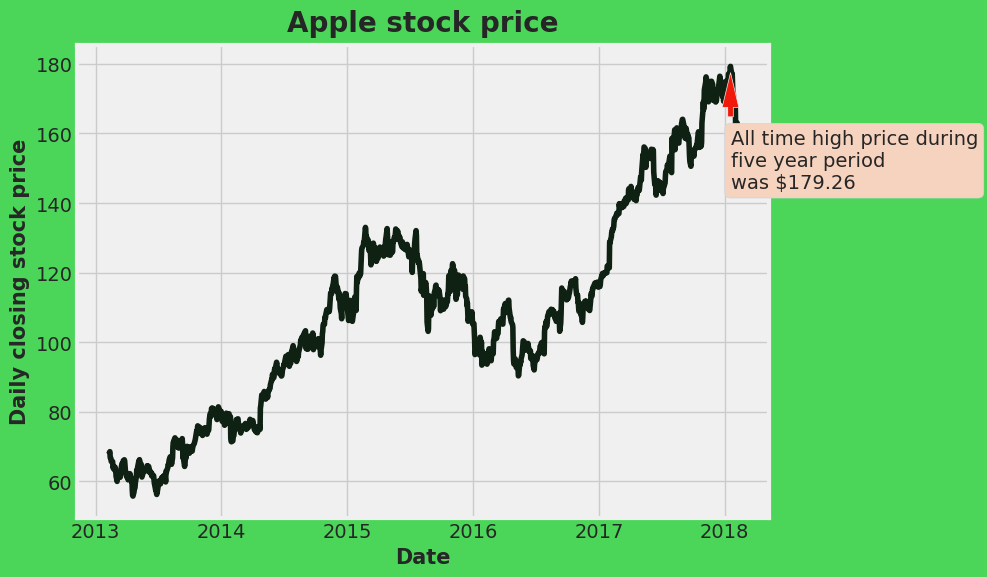

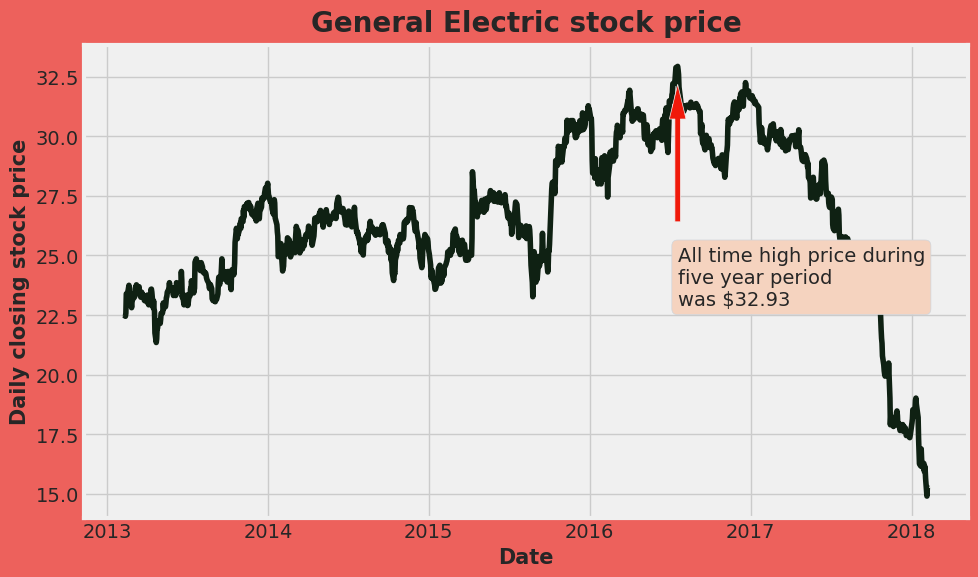

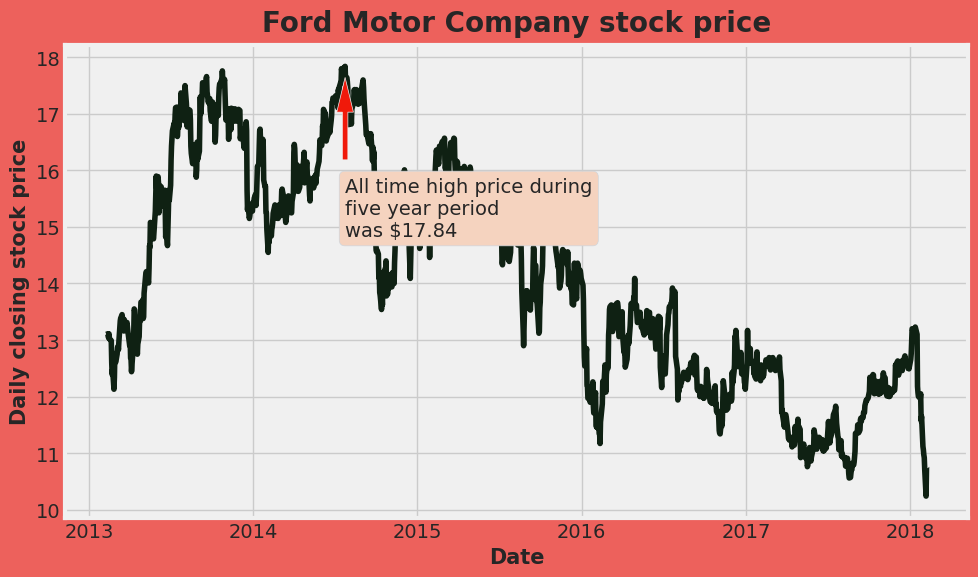

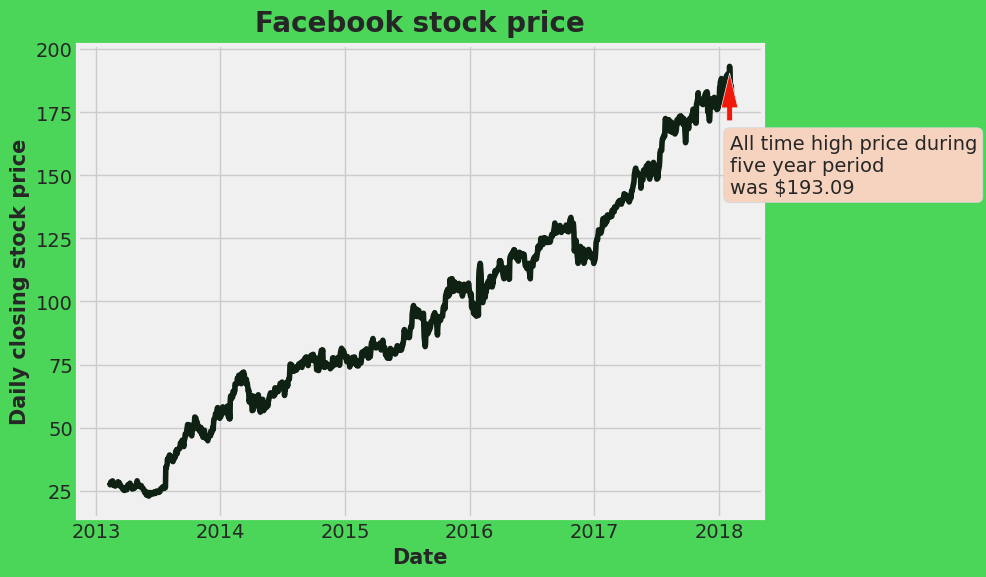

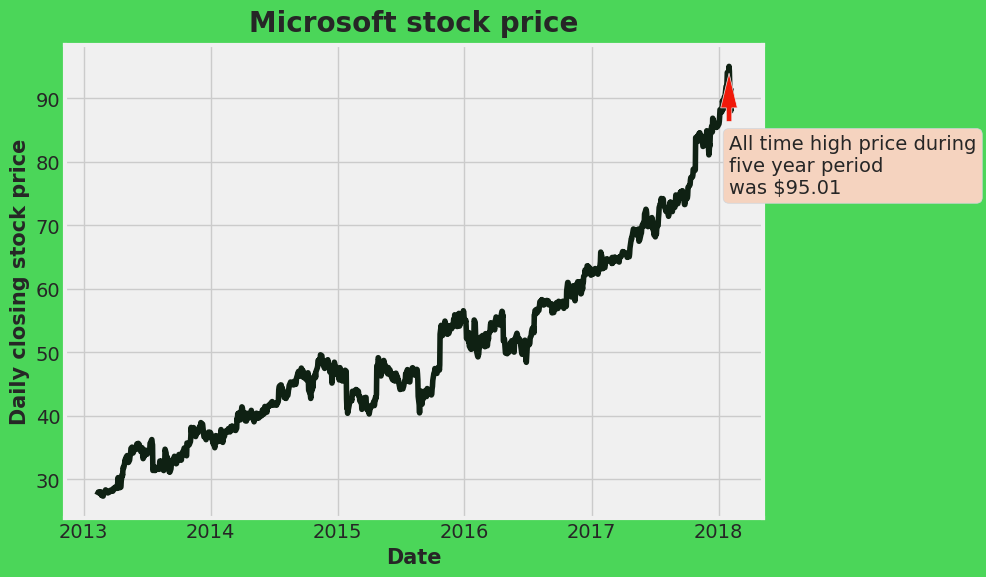

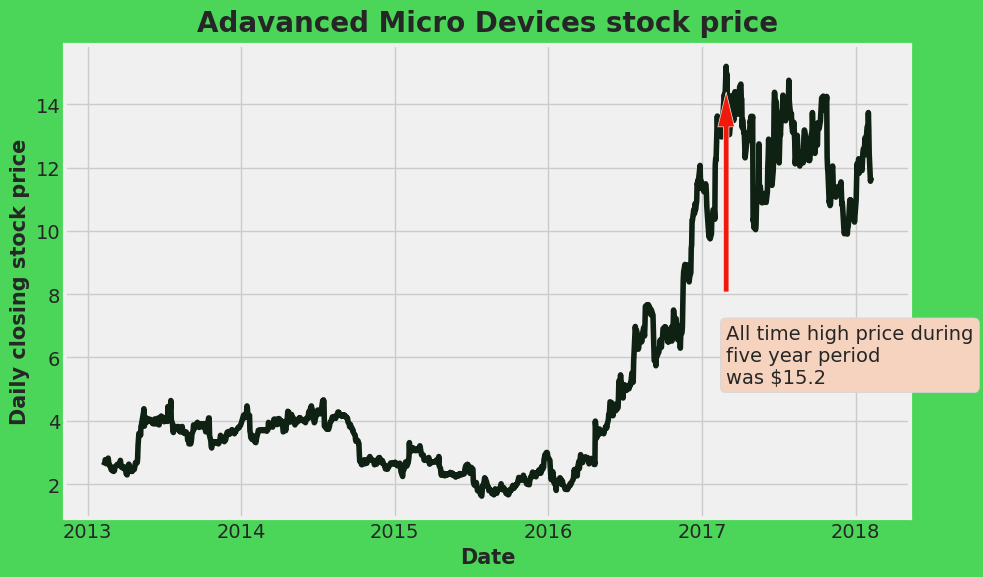

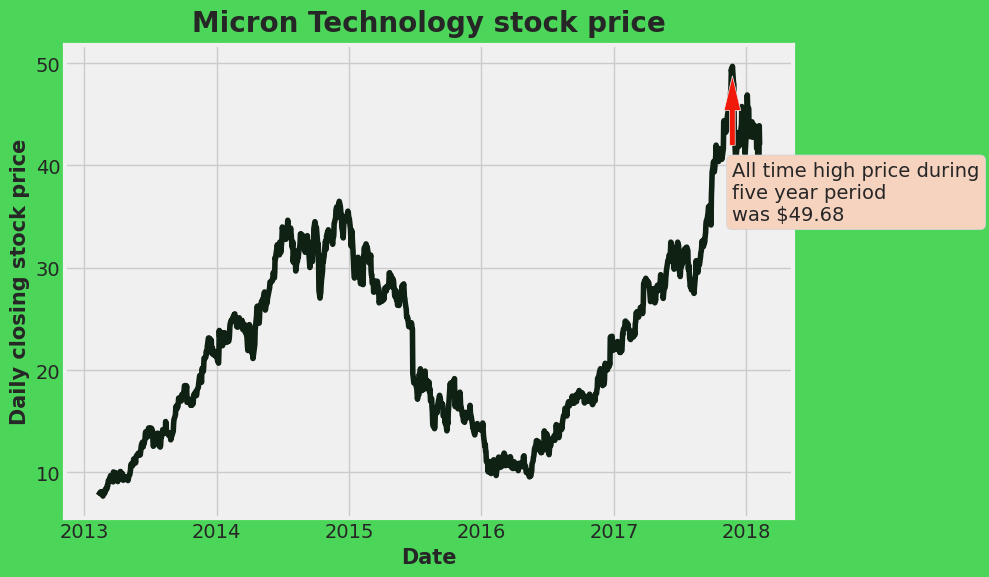

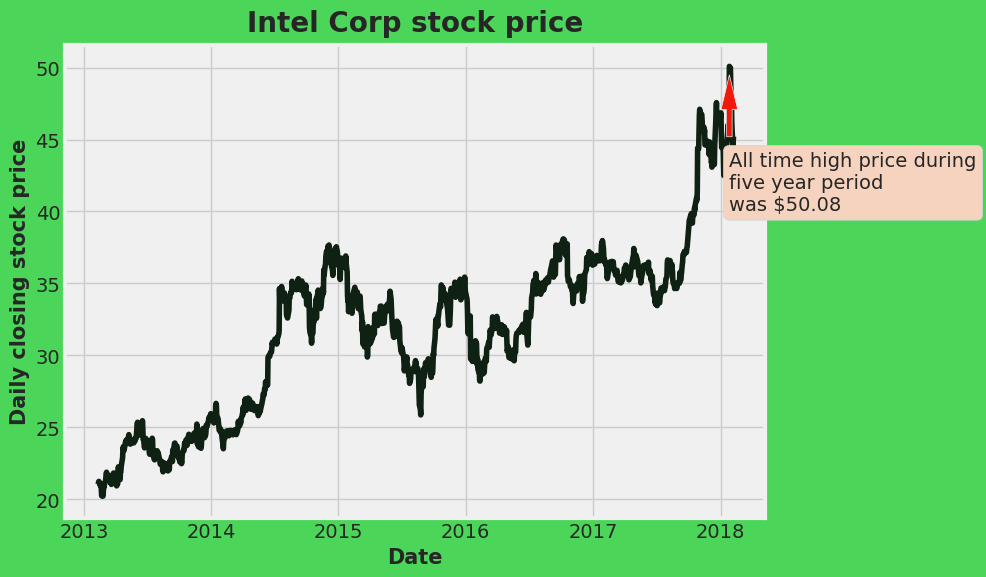

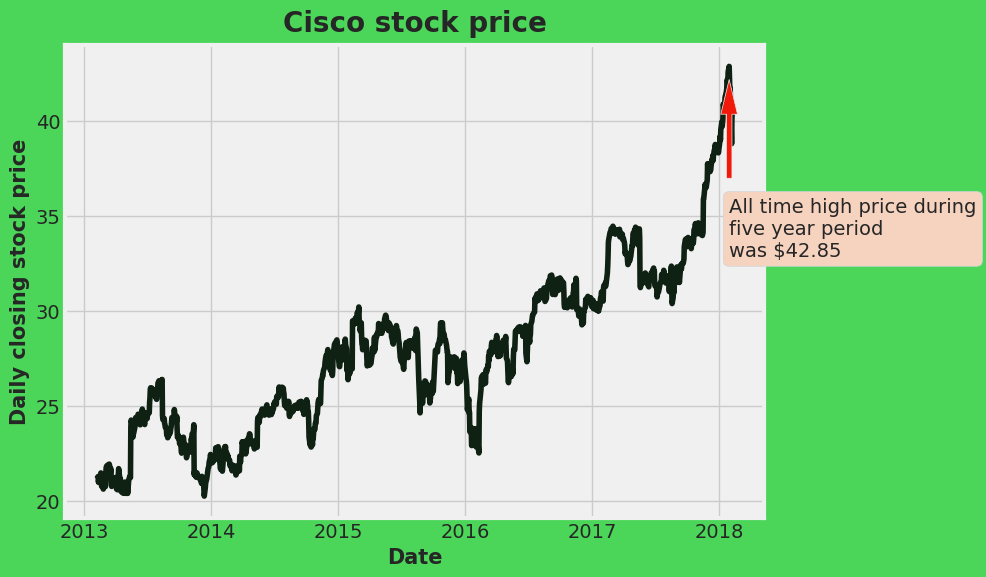

In [13]:
# The function returns the closing stock price for the past five years.
def closing_stock_price(df):

    # define highest stock over 5 period of time with date of the same
    high = df['close'].max()
    datetime = df[df['close'] == df['close'].max()]['date'].values

    if df['ticks'].unique()[0] == 'GE':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    elif df['ticks'].unique()[0] == 'F':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    else:
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['close'], color='#0f2113')
    ax.set_title(f"{df['co_name'].unique()[0]} stock price", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily closing stock price", fontsize=15)
    if df['ticks'].unique()[0] == 'AAPL':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'F':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-3),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'FB':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-50),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MSFT':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-20),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MU':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-15),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    else:
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-10),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))

    plt.show()

# plot of all the closing stocks
closing_stock_price(bac_df)
closing_stock_price(aapl_df)
closing_stock_price(ge_df)
closing_stock_price(f_df)
closing_stock_price(fb_df)
closing_stock_price(msft_df)
closing_stock_price(amd_df)
closing_stock_price(mu_df)
closing_stock_price(intc_df)
closing_stock_price(csco_df)

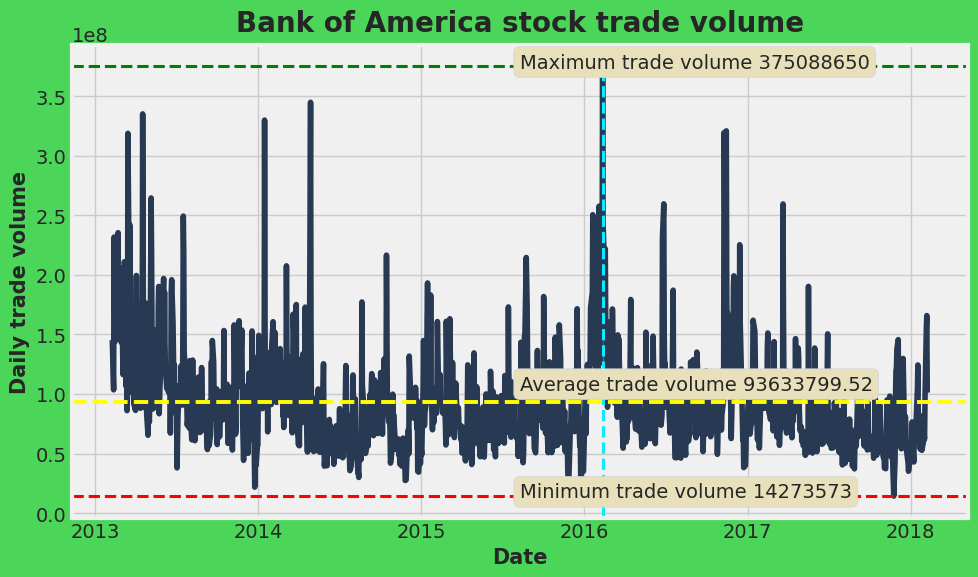

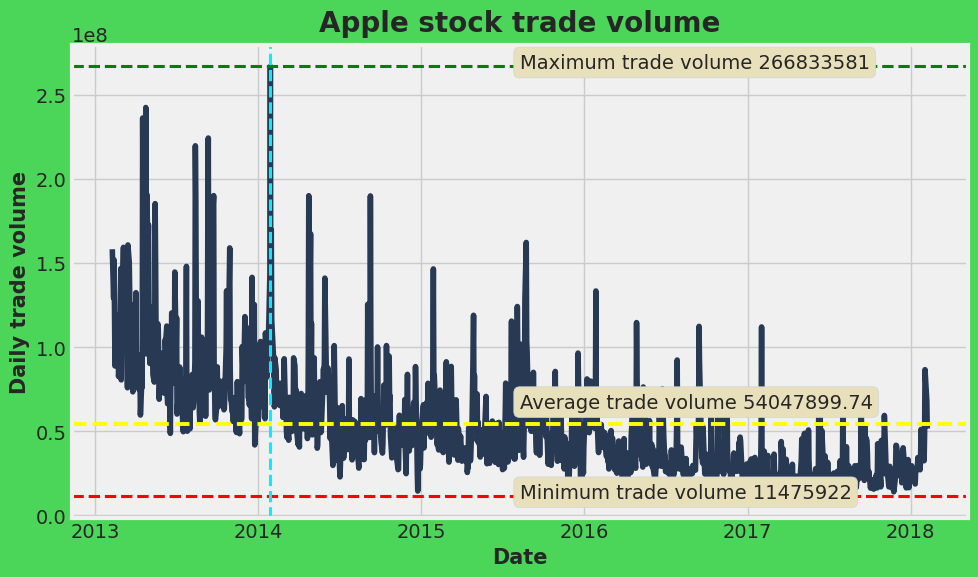

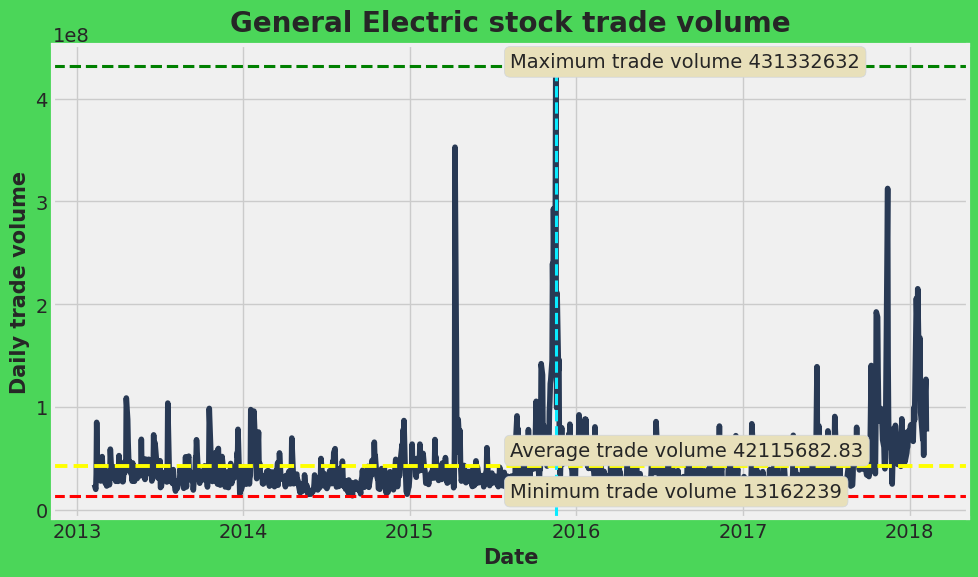

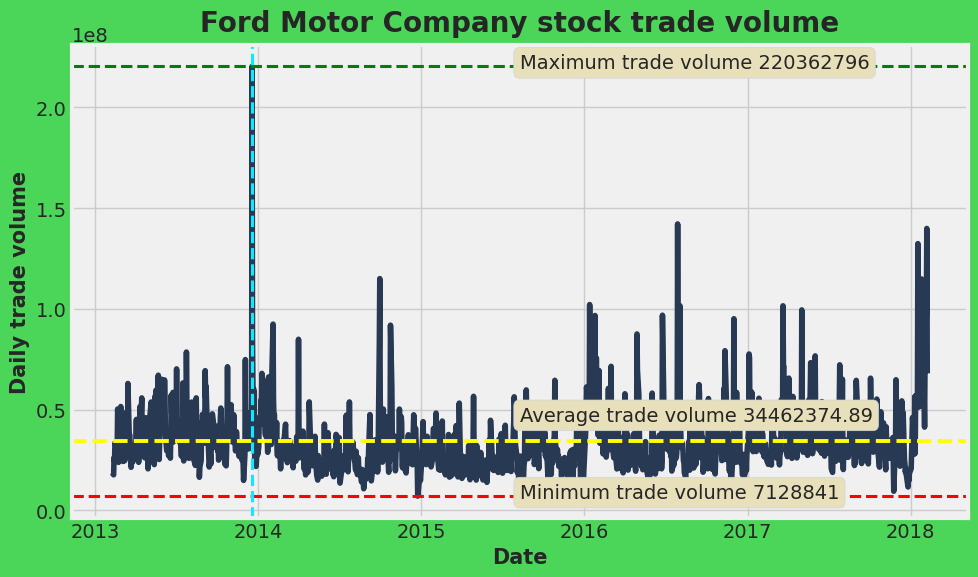

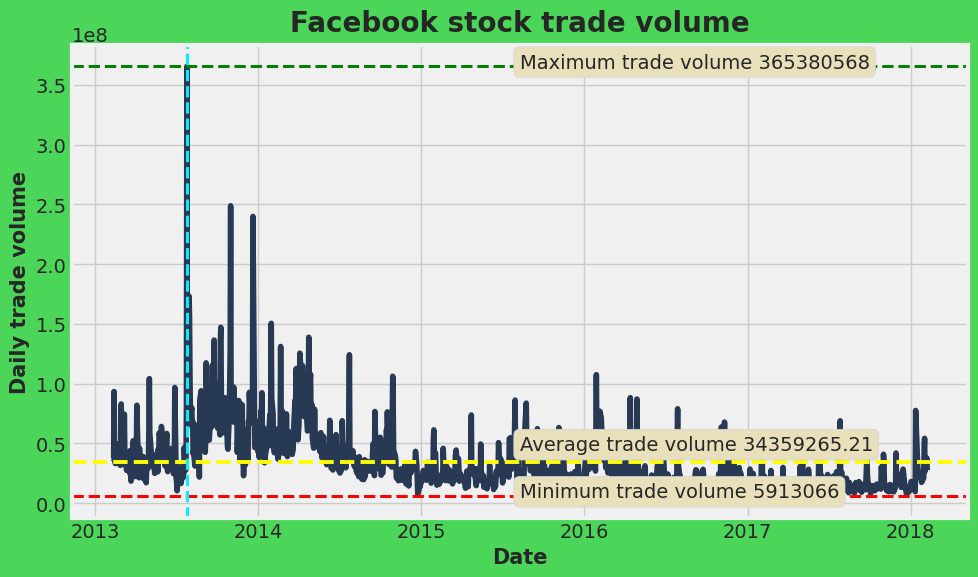

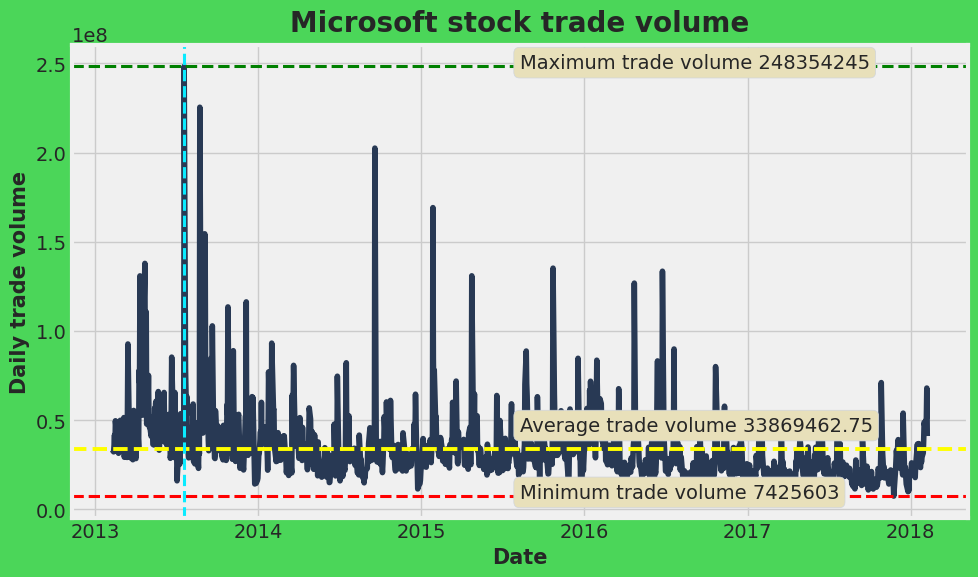

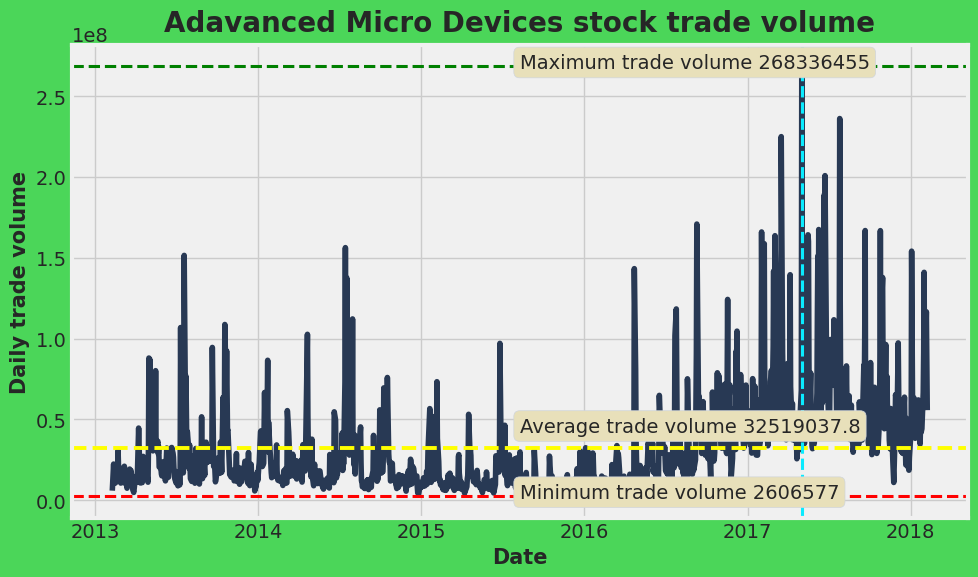

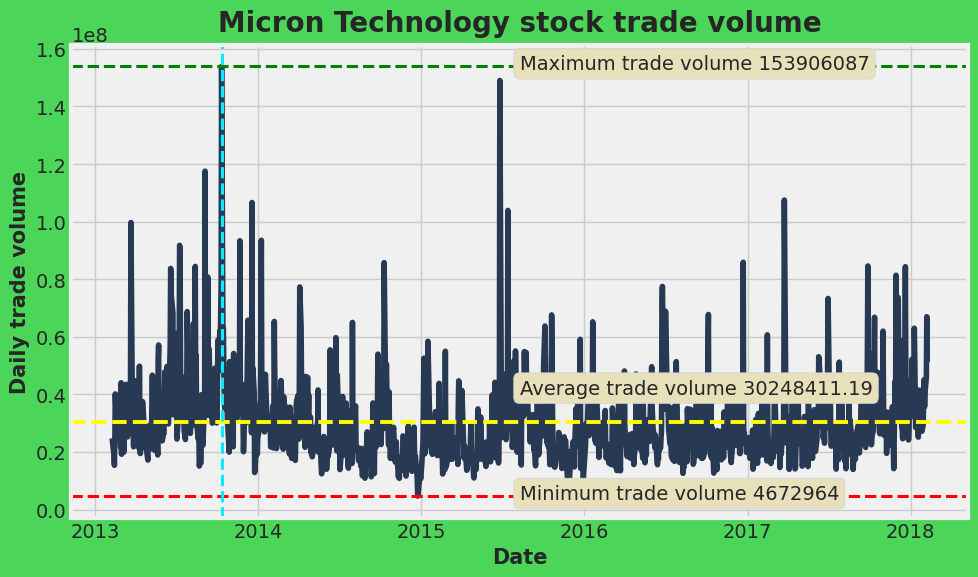

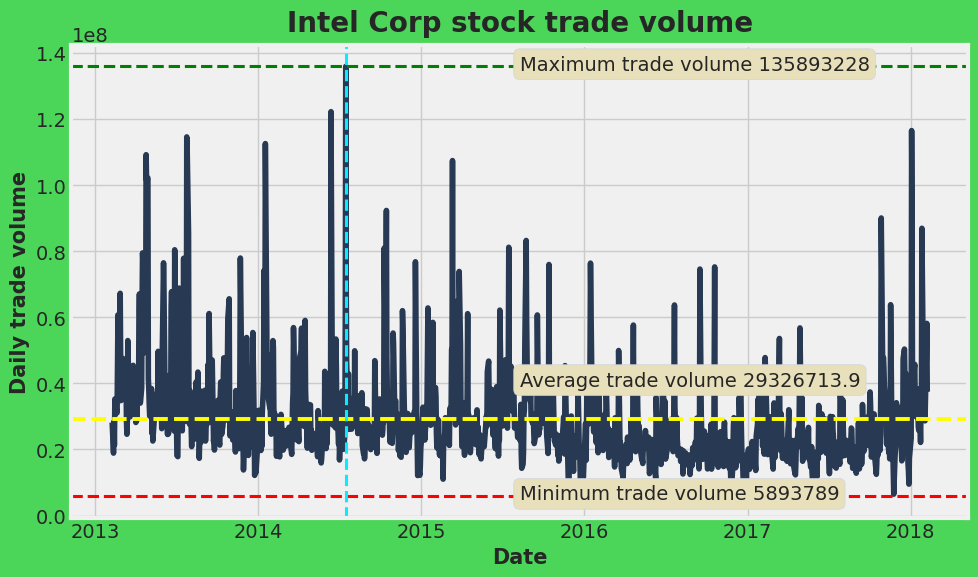

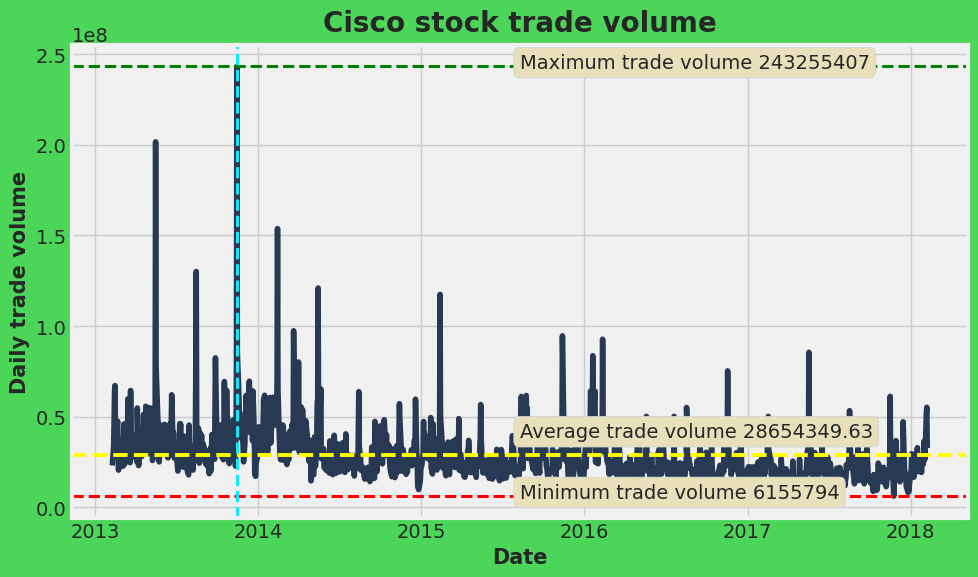

In [14]:
# function to visualize trade volume of stocks
def trade_vol(df):

    # x and y coords for average trade volume
    ave_x = df['date'].mean()
    ave_y = df['volume'].mean()
    # y coord for max trade vol
    max_y = df['volume'].max()
    # y coord for min trade vol
    min_y = df['volume'].min()

    fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['volume'], color='#283954')
    ax.set_title(f"{df['co_name'].unique()[0]} stock trade volume", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily trade volume", fontsize=15)
    ax.axhline(y=df['volume'].max(), linestyle='--', lw=2.2, color='green')
    ax.axhline(y=df['volume'].min(), linestyle='--',lw=2.2, color='red')
    ax.axhline(y=df['volume'].mean(), linestyle='--',lw=2.8, color='yellow')
    ax.axvline(x=df[df['volume'] == max_y]['date'].values, ls='--', lw='2.2', color='#0aebff')
    ax.annotate(f"Average trade volume {round(df['volume'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Maximum trade volume {df['volume'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Minimum trade volume {df['volume'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )

    plt.show()


# plot of all stocks trade volume
trade_vol(bac_df)
trade_vol(aapl_df)
trade_vol(ge_df)
trade_vol(f_df)
trade_vol(fb_df)
trade_vol(msft_df)
trade_vol(amd_df)
trade_vol(mu_df)
trade_vol(intc_df)
trade_vol(csco_df)

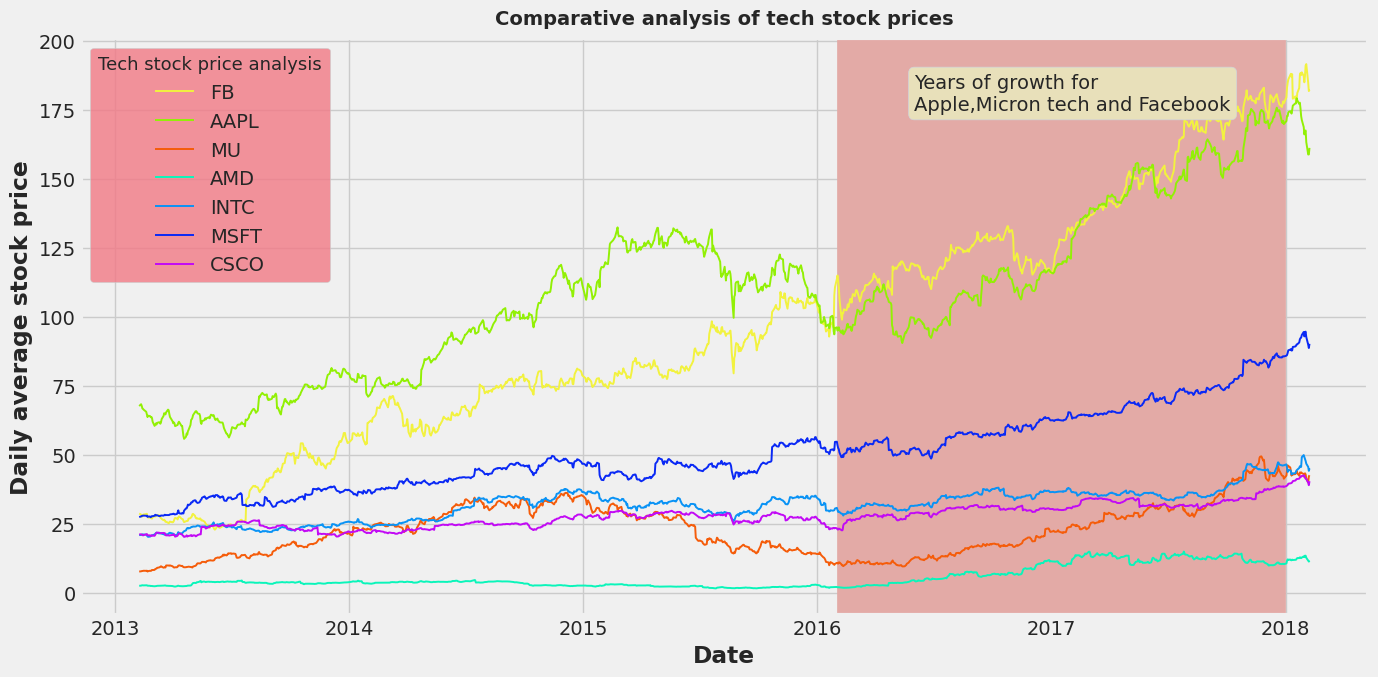

In [15]:
# stocks price comparison
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(fb_df['date'], fb_df['daily_mean'],label='FB', color='#f2f23f', lw=1.4)
ax.plot(aapl_df['date'], aapl_df['daily_mean'],label='AAPL', color='#92f005', lw=1.4)
ax.plot(mu_df['date'], mu_df['daily_mean'],label='MU', color='#f55c0a', lw=1.4)
ax.plot(amd_df['date'], amd_df['daily_mean'],label='AMD', color='#0af5ba', lw=1.4)
ax.plot(intc_df['date'], intc_df['daily_mean'],label='INTC', color='#0a93f5', lw=1.4)
ax.plot(msft_df['date'], msft_df['daily_mean'],label='MSFT', color='#0a29f5', lw=1.4)
ax.plot(csco_df['date'], csco_df['daily_mean'],label='CSCO', color='#c20af5', lw=1.4)
ax.axvspan(*mdates.datestr2num(['2/1/2016','12/31/2017']), color='#e3aaa6')
ax.set_title("Comparative analysis of tech stock prices")
ax.annotate("Years of growth for\nApple,Micron tech and Facebook", xy=(mdates.datestr2num('6/1/2016'),175),
           bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(facecolor='#f27985', fontsize="medium", title="Tech stock price analysis", title_fontsize=13)

plt.show()

we are proposing to predict the stock(any company) OPENING price ,
here we consider Wells Fargo & Company (WFC) stock price

# **3. Predict Stock OPEN price of WFC using Customized Six Layered LSTM Deep NN Model**

In [16]:
SP500AW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


## 3.1 Considering the WFC Stock

In [17]:
# Assuming SP500AW is the DataFrame you want to work with
SP500W = SP500AW.copy()  # Create a copy of the DataFrame to avoid warnings

# Replace the column name from Name to Ticks
SP500W.rename(columns={'Name': 'Ticks'}, inplace=True)

# Filter the DataFrame for the stock with ticker 'WFC'
SP500W = SP500W.loc[SP500W['Ticks'] == 'WFC']

# Display the first few rows of the DataFrame
SP500W.head()


,date,open,high,low,close,volume,Ticks
591411,2013-02-08,34.69,34.915,34.68,34.88,18425772,WFC
591412,2013-02-11,34.95,35.390,34.92,35.26,24198800,WFC
591413,2013-02-12,35.33,35.550,35.22,35.51,19556611,WFC
591414,2013-02-13,35.45,35.520,34.95,35.13,21344989,WFC
591415,2013-02-14,35.02,35.270,34.91,35.21,22295663,WFC


In [18]:
SP500W.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 591411 to 592669
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


# 3.2 Visulaization

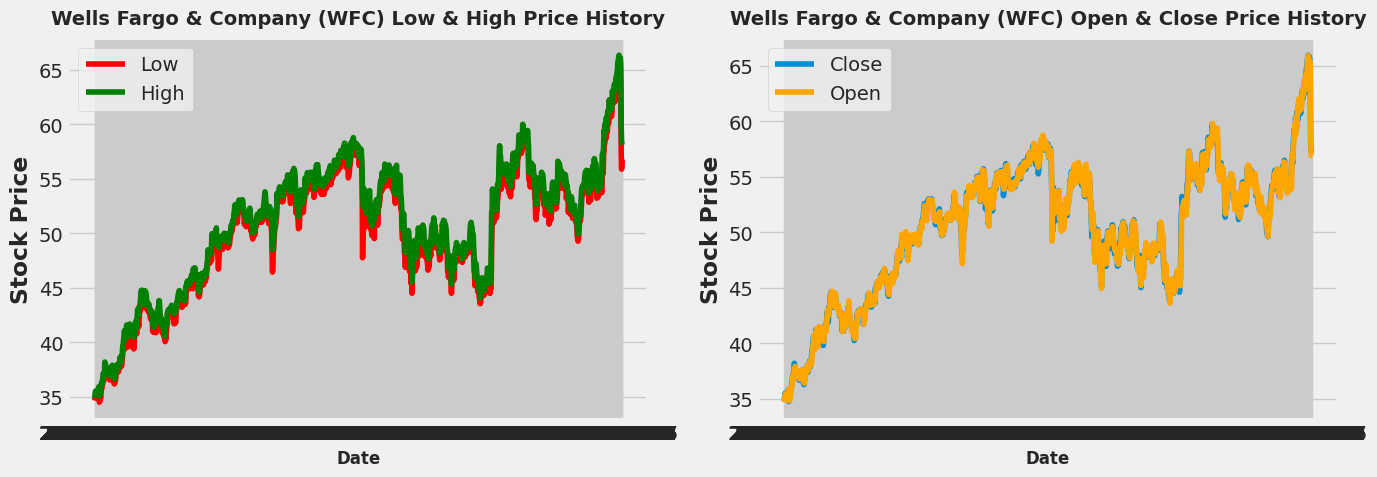

In [19]:
import matplotlib.pyplot as plt

# Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# First Subplot: Low and High Prices
ax1.plot(SP500W["date"], SP500W["low"], color="red", label="Low")
ax1.plot(SP500W["date"], SP500W["high"], color="green", label="High")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Wells Fargo & Company (WFC) Low & High Price History")
ax1.legend()

# Second Subplot: Open and Close Prices
ax2.plot(SP500W["date"], SP500W["close"], label="Close")
ax2.plot(SP500W["date"], SP500W["open"], color="orange", label="Open")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Wells Fargo & Company (WFC) Open & Close Price History")
ax2.legend()

# Show plots
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure
plt.show()



## 3.3 .Spliting Data as Train and Validation

In [20]:
# Drop specified columns from the DataFrame
SP500W = SP500W.drop(['close', 'high', 'low', 'volume', 'Ticks'], axis=1)

# Rename the specified columns
SP500W.rename(columns={'open': 'Opening', 'date': 'Date'}, inplace=True)

# Display the first few rows of the modified DataFrame
SP500W.head()


,Date,Opening
591411,2013-02-08,34.69
591412,2013-02-11,34.95
591413,2013-02-12,35.33
591414,2013-02-13,35.45
591415,2013-02-14,35.02


In [21]:
length_SP500W = len(SP500W)     # Total data length
split_ratio = 0.9               # 90% for training
length_train = round(length_SP500W * split_ratio)  # Calculate training data length
length_test = length_SP500W - length_train         # Remaining data for testing

# If you want a validation set, you might split the test set further:
validation_split_ratio = 0.5  # Example ratio to split test data into validation and test sets
length_validation = round(length_test * validation_split_ratio)  # Calculate validation data length
length_test = length_test - length_validation  # Update test data length

print("SP500W length :", length_SP500W)
print("Train SP500W length :", length_train)
print("Validation SP500W length :", length_validation)
print("Test SP500W length :", length_test)


SP500W length : 1259
Train SP500W length : 1133
Validation SP500W length : 63
Test SP500W length : 63


In [22]:
train_data = SP500W[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Opening
591411,2013-02-08,34.69
591412,2013-02-11,34.95
591413,2013-02-12,35.33
591414,2013-02-13,35.45
591415,2013-02-14,35.02
...,...,...
592539,2017-08-02,53.54
592540,2017-08-03,53.50
592541,2017-08-04,53.67
592542,2017-08-07,52.73


In [51]:
validation_data = SP500W[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Opening
592544,2017-08-09,52.280
592545,2017-08-10,52.390
592546,2017-08-11,51.830
592547,2017-08-14,52.370
592548,2017-08-15,53.200
...,...,...
592665,2018-02-01,65.370
592666,2018-02-02,65.330
592667,2018-02-05,58.700
592668,2018-02-06,56.905



## 3.4 Creating Train Dataset from Train split

* We will get Opening column as our dataset
* Dataset to be converted to array by adding `.values`

In [24]:
# Assuming SP500W has been defined and length_train has been calculated as per previous message
train_data = SP500W.iloc[:length_train]
dataset_train = train_data['Opening'].values  # Extracting 'Opening' values as a NumPy array

# Checking the shape of the extracted data
dataset_train_shape = dataset_train.shape


In [25]:
print("Training dataset shape: ", dataset_train_shape)


Training dataset shape:  (1133,)


In [26]:
import numpy as np

# Reshaping 1D array to 2D array with shape (length_train, 1)
dataset_train = np.reshape(dataset_train, (-1, 1))

# Checking the new shape of the array
print("Reshaped training dataset shape: ", dataset_train.shape)


Reshaped training dataset shape:  (1133, 1)



## 3.5 Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler(feature_range = (0,1))

# Note: This assumes that your data is in the shape (num_samples, num_features)
dataset_train_scaled = scaler.fit_transform(dataset_train)

# Checking the new shape of the scaled dataset
print("Shape of scaled training dataset: ", dataset_train_scaled.shape)


Shape of scaled training dataset:  (1133, 1)


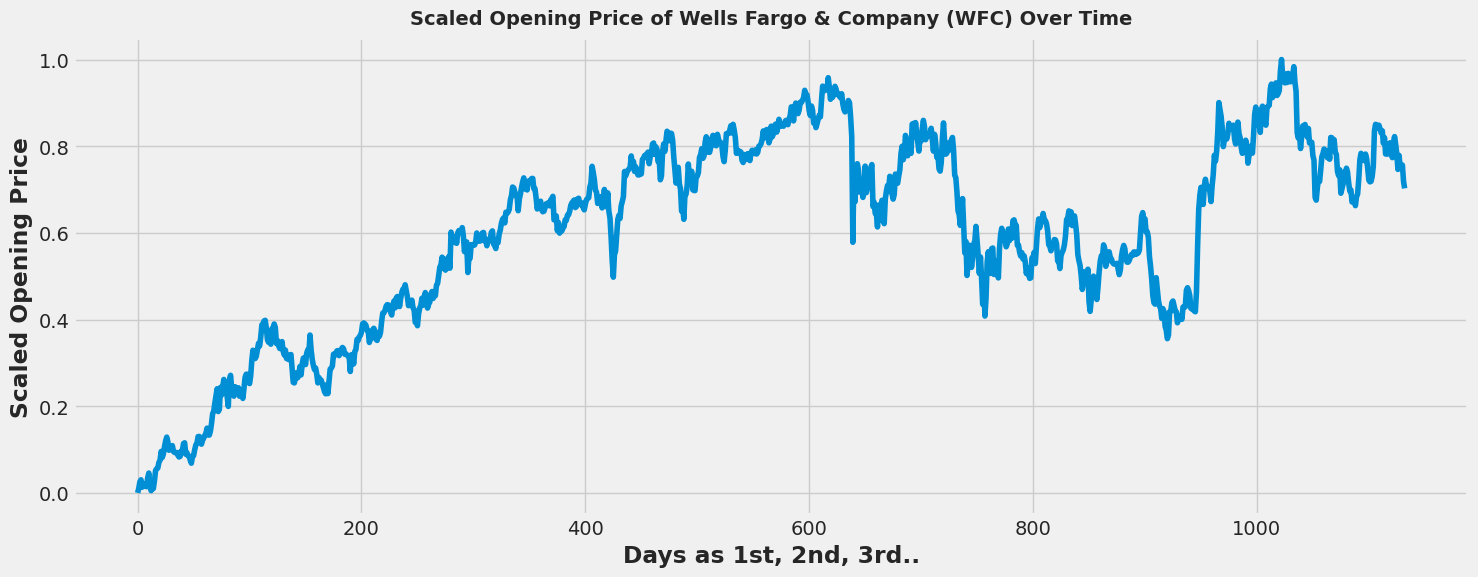

In [28]:
import matplotlib.pyplot as plt

# Create a new figure with a specific size
plt.subplots(figsize=(15, 6))

# Plot the scaled data
plt.plot(dataset_train_scaled)

# Labeling the axes and the plot
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Scaled Opening Price")
plt.title("Scaled Opening Price of Wells Fargo & Company (WFC) Over Time")

# Display the plot
plt.show()


## 3.6 X_train and y_train

In [29]:
import numpy as np

# Initialize empty lists to hold the training sequences and labels
X_train = []
y_train = []

time_step = 50

# Create sequences and labels for training
for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i, 0])  # Extract sequences of length `time_step`
    y_train.append(dataset_train_scaled[i, 0])  # Extract the next value in the sequence to be the label

# Convert the lists to NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)


In [30]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (1083, 50)
Shape of y_train: (1083,)


In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print("Shape of X_train after reshape :", X_train.shape)
print("Shape of y_train after reshape :", y_train.shape)


Shape of X_train after reshape : (1083, 50, 1)
Shape of y_train after reshape : (1083, 1)



## 3.7 Customized Six Layered LSTM Deep NN Model

In [32]:
y_train = scaler.fit_transform(y_train)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Model Configuration
lstm_units = 64  # Number of LSTM units
dense_units = 32  # Number of Dense layer units
num_lstm_layers = 4  # Number of LSTM layers
input_shape = (X_train.shape[1], 1)  # Input shape for LSTM layer

# Initialize model
DeepFourLSTM_TwoDense = Sequential()

# Add LSTM layers
DeepFourLSTM_TwoDense.add(LSTM(lstm_units, return_sequences=True, input_shape=input_shape))
for _ in range(num_lstm_layers - 2):  # Subtracting 1 for first LSTM layer, and 1 for the last LSTM layer
    DeepFourLSTM_TwoDense.add(LSTM(lstm_units, return_sequences=True))

# Add final LSTM layer without return_sequences=True
DeepFourLSTM_TwoDense.add(LSTM(lstm_units, return_sequences=False))

# Add Dense layers
DeepFourLSTM_TwoDense.add(Dense(dense_units))
DeepFourLSTM_TwoDense.add(Dense(1))


In [34]:
DeepFourLSTM_TwoDense.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ba7a52f41f0>>

In [37]:
# Model Configuration
loss_function = "mean_squared_error"
optimizer = "adam"
epochs = 100
batch_size = 8

# Compile the model
DeepFourLSTM_TwoDense.compile(loss=loss_function, optimizer=optimizer)

# Fit the model
history = DeepFourLSTM_TwoDense.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/100
136/136 [==============================] - 7s 11ms/step - loss: 0.0038
Epoch 2/100
136/136 [==============================] - 1s 10ms/step - loss: 0.0034
Epoch 3/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0021
Epoch 4/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 5/100
136/136 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 6/100
136/136 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 7/100
136/136 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 8/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 9/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0011
Epoch 10/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 11/100
136/136 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 12/100
136/136 [==============================] - 2s 11ms/step - loss: 0.0014
E


## 3.8.Evaluation of Proposed Customized Six Layered LSTM Deep NN Model

In [38]:
def plot_training_history(history, title='Training History'):
    """
    Plots the training history of a neural network.

    Parameters:
        - history: History object (output from model.fit())
        - title: str, title of the plot
    """
    plt.figure(figsize=(10,5))
    plt.plot(history.history["loss"], label="Training Loss")

    # You might also want to plot validation loss if it's available
    if 'val_loss' in history.history:
        plt.plot(history.history["val_loss"], label="Validation Loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()


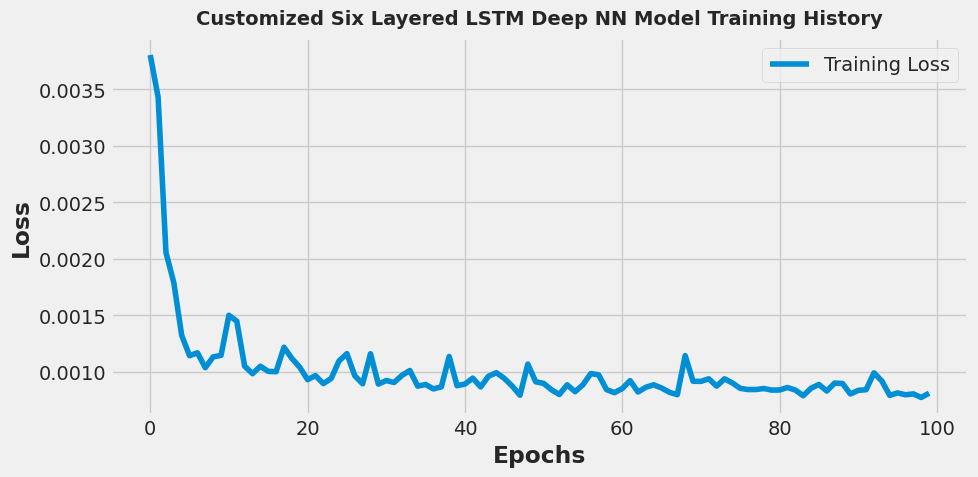

In [41]:
plot_training_history(history, title='Customized Six Layered LSTM Deep NN Model Training History')


## 3.9.Test the Proposed Customized Six Layered LSTM Deep NN Model

In [52]:
validation_data

,Date,Opening
592544,2017-08-09,52.280
592545,2017-08-10,52.390
592546,2017-08-11,51.830
592547,2017-08-14,52.370
592548,2017-08-15,53.200
...,...,...
592665,2018-02-01,65.370
592666,2018-02-02,65.330
592667,2018-02-05,58.700
592668,2018-02-06,56.905


In [71]:
# Extract the "Opening" column from the validation data and scale it
scaled_dataset_validation = scaler.fit_transform(validation_data['Opening'].values.reshape(-1, 1))

# Print the shape of the scaled validation dataset
print("Shape of scaled validation dataset:", scaled_dataset_validation.shape)


Shape of scaled validation dataset: (126, 1)


In [73]:
# Create X_test and y_test using list comprehensions
X_test = [scaled_dataset_validation[i - time_step:i, 0] for i in range(time_step, length_validation)]
y_test = [scaled_dataset_validation[i, 0] for i in range(time_step, length_validation)]

# Convert them to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape X_test to a 3D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Reshape y_test to a 2D array
y_test = np.reshape(y_test, (-1, 1))

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)


Shape of X_test before reshape : (13, 50, 1)
Shape of y_test before reshape : (13, 1)


1/1 [==============================] - 0s 26ms/step


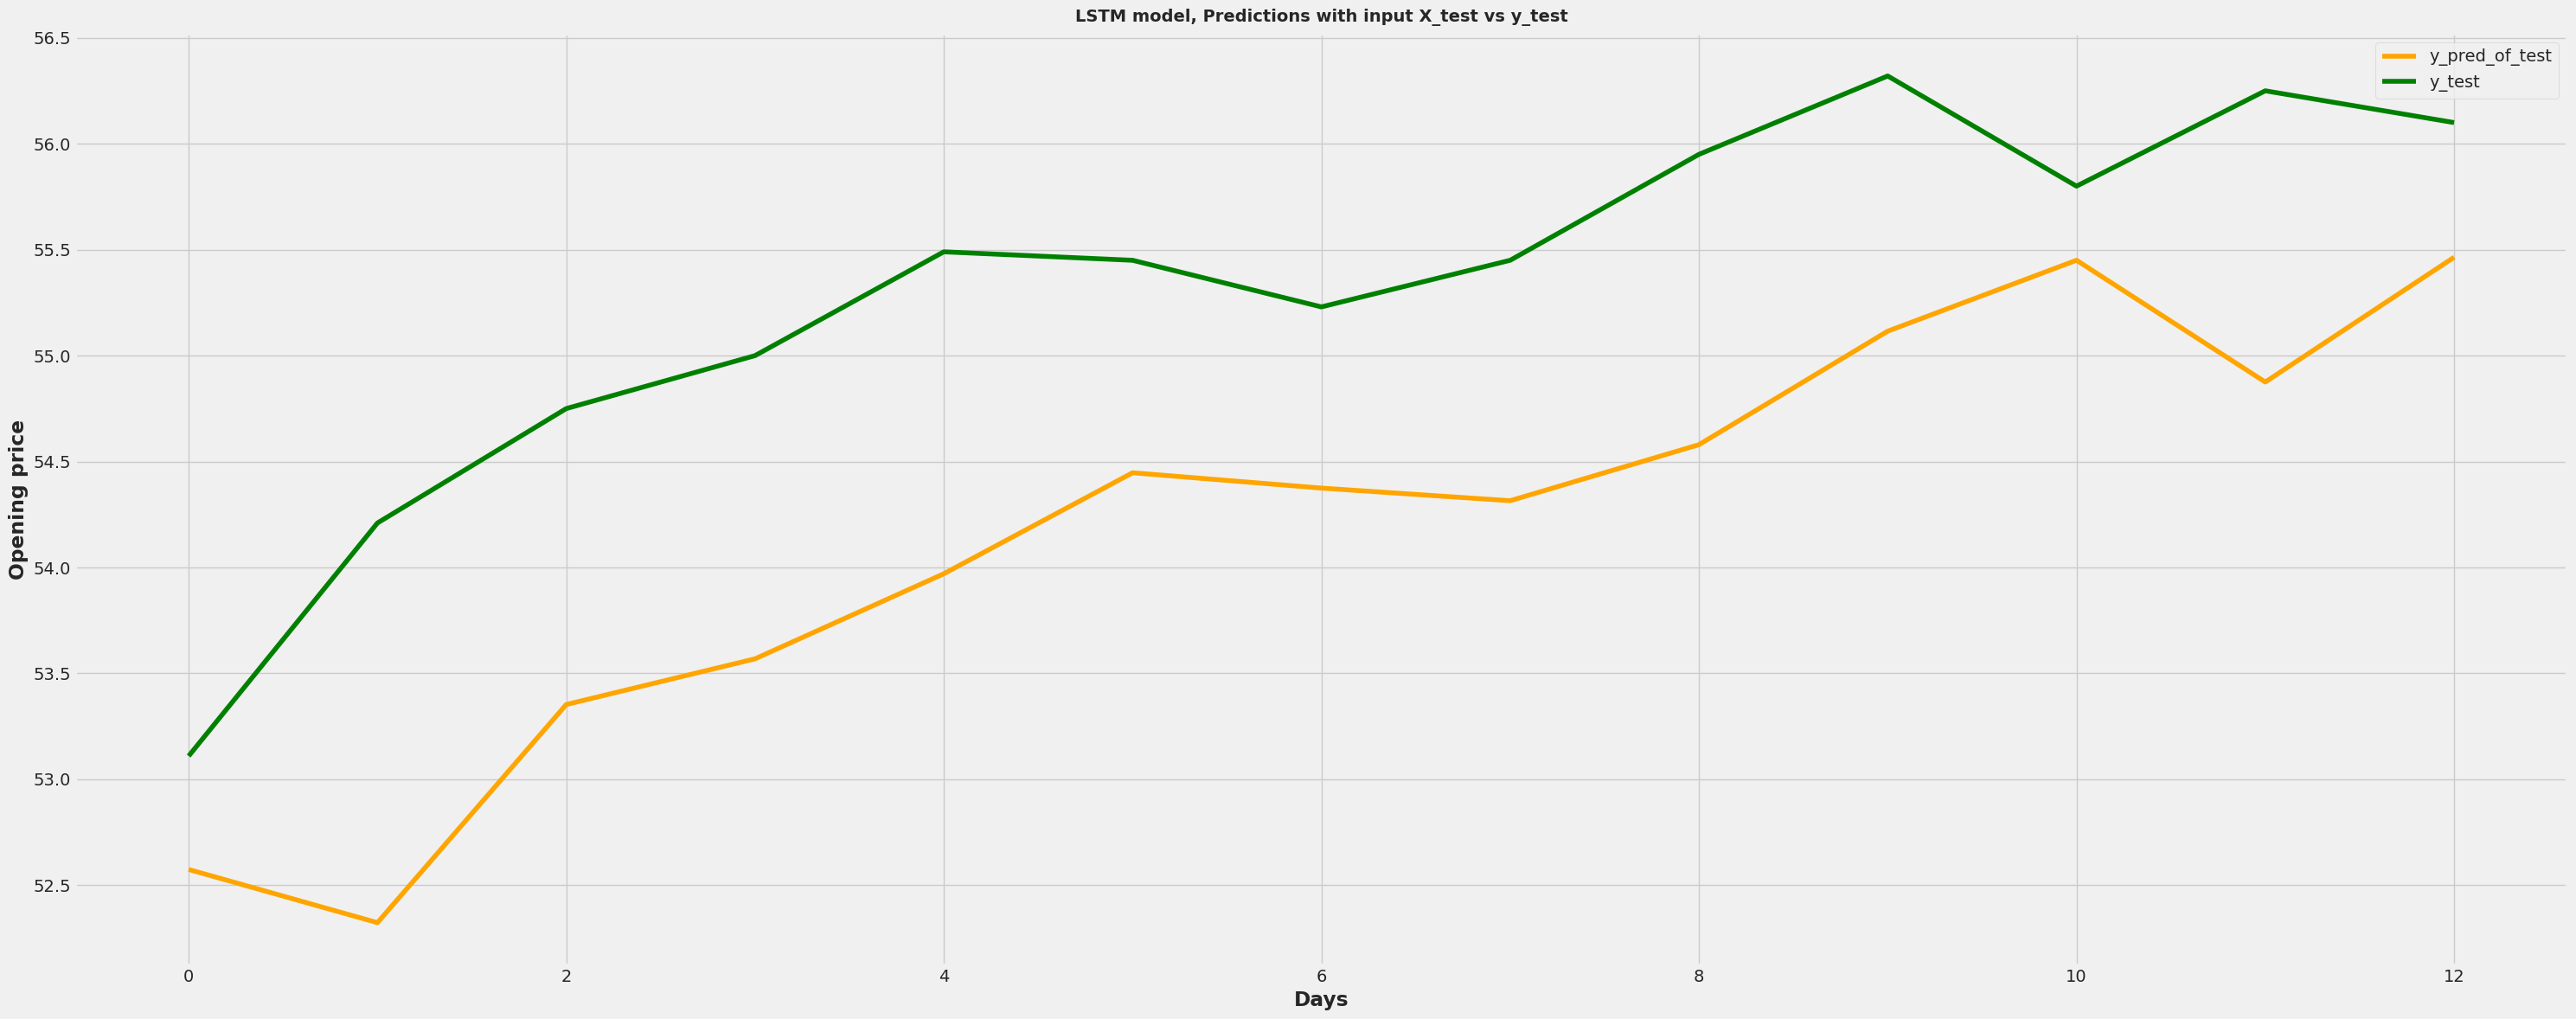

In [74]:
import matplotlib.pyplot as plt

# Inverse transform the scaled predictions and y_test
y_pred_test = scaler.inverse_transform(DeepFourLSTM_TwoDense.predict(X_test))
y_test_original = scaler.inverse_transform(y_test)

# Create the plot
plt.figure(figsize=(30, 12))
plt.plot(y_pred_test, label="y_pred_of_test", color="orange")
plt.plot(y_test_original, label="y_test", color="g")
plt.xlabel("Days")
plt.ylabel("Opening price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()


In [75]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error as mae,
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
    median_absolute_error,
)


In [76]:


# Calculate predictions
predictions = DeepFourLSTM_TwoDense.predict(X_test)[:, 0]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = np.round(100 * np.sqrt(mse) / np.mean(y_test), 2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.round(100 * mean_absolute_error(y_test, predictions) / np.mean(y_test), 2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)


1/1 [==============================] - 0s 29ms/step


In [77]:
NRMSE

21.15

In [78]:
mape

19.81

In [79]:
MAE

0.06945012372949594

In [80]:
r2

-0.9482106014677751


## 3.10 WFC Opening price prediction

What is the date of the last day in our dataset?

In [81]:
last_row = SP500W.iloc[-1]


In [82]:
X_input = SP500W.iloc[-time_step:].Opening.values  # Getting the last 50 rows and converting to an array
X_input = scaler.fit_transform(X_input.reshape(-1, 1))  # Converting to a 2D array and scaling
X_input = np.reshape(X_input, (1, 50, 1))  # Reshaping to a 3D array
print("Shape of X_input:", X_input.shape)


Shape of X_input: (1, 50, 1)


In [83]:
WFC_Opening_price_prediction = scaler.inverse_transform(DeepFourLSTM_TwoDense.predict(X_input))
print("WFC_Opening_price_prediction on  3/18/2017:", WFC_Opening_price_prediction[0, 0])


1/1 [==============================] - 0s 29ms/step
WFC_Opening_price_prediction on  3/18/2017: 57.151638


Thank You